In [17]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

# Puntos en DataFrame
puntos = {
    'A': (2, 3),
    'B': (5, 4),
    'C': (1, 1),
    'D': (6, 7),
    'E': (3, 5),
    'F': (8, 2),
    'G': (4, 6),
    'H': (2, 1)
}

In [23]:
df = pd.DataFrame.from_dict(puntos, orient='index', columns=['x', 'y'])

# Obtener todas las combinaciones de pares sin repetir ni comparar consigo mismo
pares = []
lista = df.index.tolist()

In [28]:
for i in range(len(lista)):
    for j in range(i + 1, len(lista)):
        p1, p2 = lista[i], lista[j]
        v1, v2 = df.loc[p1].values, df.loc[p2].values

        # Distancias
        pares.append({
            'p1': p1,
            'p2': p2,
            'euclidiana': distance.euclidean(v1, v2),
            'manhattan': distance.cityblock(v1, v2),
            'chebyshev': distance.chebyshev(v1, v2)
        })

In [32]:
# Convertir a DataFrame
df_dist = pd.DataFrame(pares)

# Mostrar maximos
for tipo in ['euclidiana', 'manhattan', 'chebyshev']:
    distanciaMax = df_dist.loc[df_dist[tipo].idxmax()]
    print(f"Distancia {tipo.title()}: mayor entre {distanciaMax['p1']} y {distanciaMax['p2']} = {distanciaMax[tipo]:.2f}")# Convertir a DataFrame

Distancia Euclidiana: mayor entre C y D = 7.81
Distancia Manhattan: mayor entre C y D = 11.00
Distancia Chebyshev: mayor entre C y F = 7.00


In [34]:
# Mostrar minimos
for tipo in ['euclidiana', 'manhattan', 'chebyshev']:
    distanciaMin = df_dist.loc[df_dist[tipo].idxmin()]
    print(f"Distancia {tipo.title()}: menor entre {distanciaMin['p1']} y {distanciaMin['p2']} = {distanciaMin[tipo]:.2f}")# Convertir a DataFrame

Distancia Euclidiana: menor entre C y H = 1.00
Distancia Manhattan: menor entre C y H = 1.00
Distancia Chebyshev: menor entre C y H = 1.00


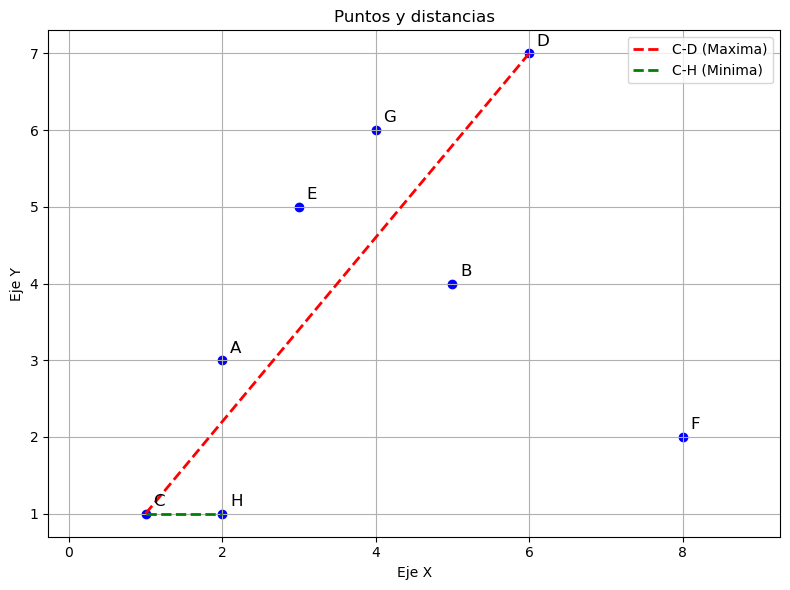

In [35]:
import matplotlib.pyplot as plt

# Obtener los puntos con distancia euclidiana
dist_max = df_dist.loc[df_dist['euclidiana'].idxmax()]
dist_min = df_dist.loc[df_dist['euclidiana'].idxmin()]

#Nombrar puntos
p1, p2 = dist_max['p1'], dist_max['p2']
p11, p22 = dist_min['p1'], dist_min['p2']

#Coordenadas
x1, y1 = puntos[p1]
x2, y2 = puntos[p2]
x3, y3 = puntos[p11]
x4, y4 = puntos[p22]

# Graficar todos los puntos
plt.figure(figsize=(8, 6))
for etiqueta, (x, y) in puntos.items():
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.1, y + 0.1, etiqueta, fontsize=12)

# Linea entre los puntos relevantes
plt.plot([x1, x2], [y1, y2], color='red', linestyle='--', linewidth=2, label=f"{p1}-{p2} (Maxima)")
plt.plot([x3, x4], [y3, y4], color='green', linestyle='--', linewidth=2, label=f"{p11}-{p22} (Minima)")

plt.title("Puntos y distancias")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()
